In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Find missing values in the dataset

In [25]:
dataset = pd.read_csv(r'D:\ML & AI Learning\Notebooks\Data\titanic\train.csv')

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


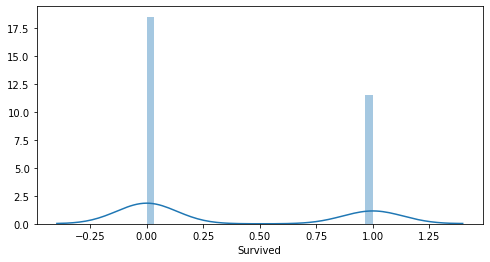

In [27]:
# Plot histogram using seaborn
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(dataset.Survived, bins =30)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
details = pd.DataFrame({'missing_count' : dataset.isnull().sum(), 'data_type':dataset.dtypes , 'missing_percent': (dataset.isnull().sum()/dataset.isnull().count())})
missing = details.query('missing_count > 0')
missing

,missing_count,data_type,missing_percent
Age,177,float64,0.198653
Cabin,687,object,0.771044
Embarked,2,object,0.002245


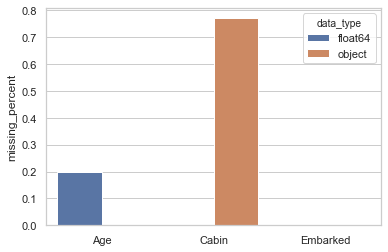

In [73]:
ax = sns.barplot(x=missing.index, y="missing_percent", hue="data_type", data=missing)

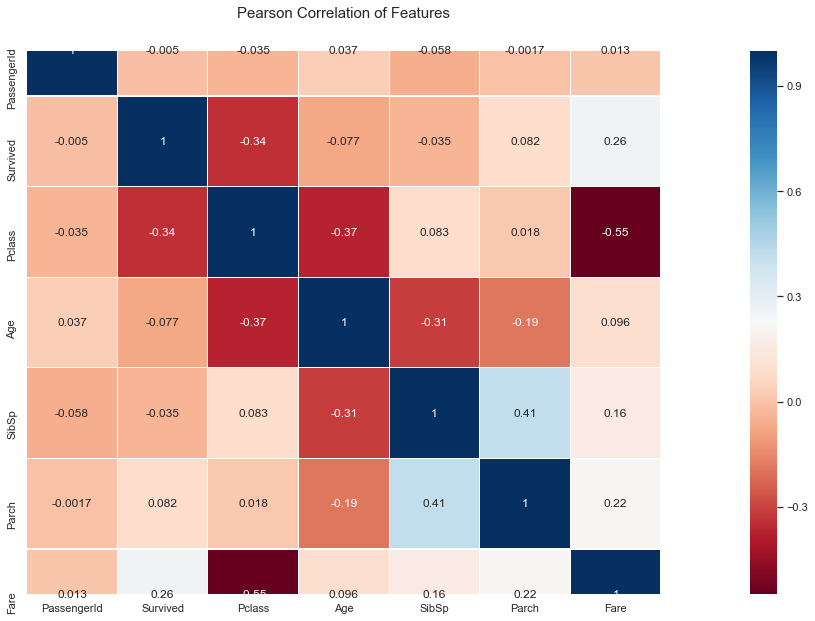

In [74]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [76]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = dataset[['Pclass','SibSp','Parch','Fare','Age']]

In [77]:
x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

In [78]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
predicted = linreg.predict(x_test)

In [82]:
dataset.Age[dataset.Age.isnull()] = predicted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
dataset = pd.read_csv(r'D:\ML & AI Learning\Notebooks\Data\titanic\train.csv')

In [1]:
import fancyimpute

ModuleNotFoundError: No module named 'fancyimpute'